In [23]:
import numpy as np
import matplotlib.pyplot as plt


 # Processus de Poisson homogène

In [24]:
Tmax = 100
Lambda = 0.5
n = np.random.poisson(Lambda*Tmax)
print(n)
T = np.sort(np.random.uniform(0,Tmax,n))

48


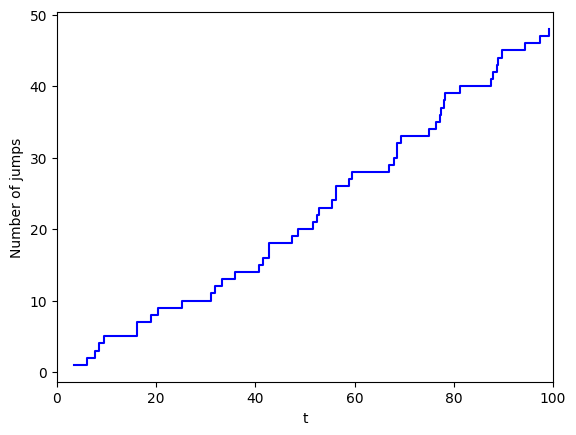

In [25]:
plt.step(T, np.arange(1, len(T) + 1), where='post', color='blue')
plt.xlim(0,Tmax)
plt.xlabel('t')
plt.ylabel('Number of jumps')
plt.savefig('Poisson_hom.png')

# Processus de Poisson non homogène

On va modéliser ça avec une méthode d'acceptation/rejet. On fixe déjà l'intensité : 

In [26]:
def Lambda_nh(t):
    return(1.5+np.cos(0.1*t))
Lambda_bar = 2.5

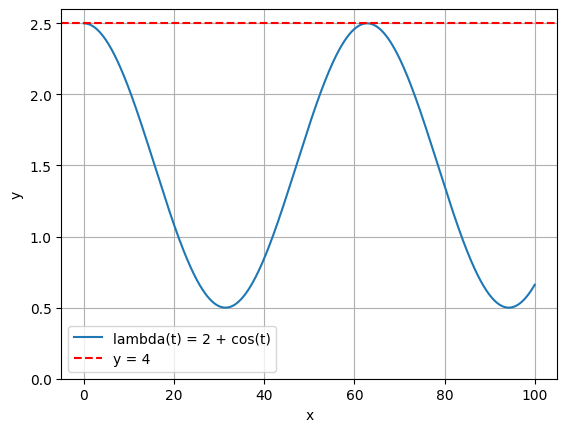

In [27]:
plt.plot(np.linspace(0,100, 1000), Lambda_nh(np.linspace(0,100, 1000)), label='lambda(t) = 2 + cos(t)')
plt.axhline(y=Lambda_bar, color='r', linestyle='--', label='y = 4')
plt.ylim(0)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [28]:
Tmax = 100
n = np.random.poisson(Lambda_bar*Tmax)
print(n)
T = np.sort(np.random.uniform(0,Tmax,n))

257


### Acceptation rejet

In [29]:
U = np.random.uniform(0,1,len(T))
filtered_T = [T[i] for i in range(len(T)) if U[i] <= Lambda_nh(T[i])/Lambda_bar]

In [30]:

#while(t < Tmax):
#    t = x[i-1] + np.random.exponential(1/Lambda_bar)
#    u = np.random.uniform(0,1)
#    x.append(t)
#    y.append(u)
#    if(t >= Tmax):
#        break
#    if(u <= Lambda_nh(t)/Lambda_bar ):
#        T.append(t)
#    i = i + 1
        

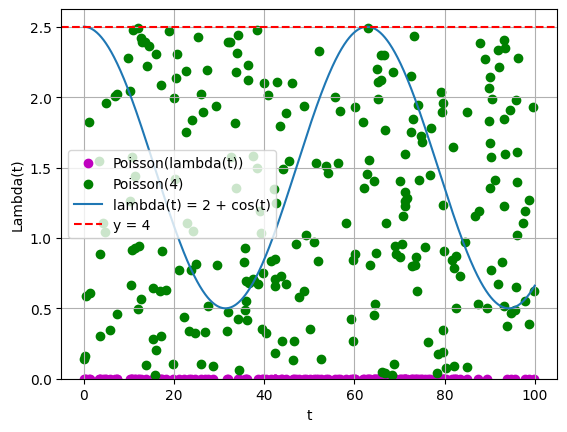

In [31]:
plt.scatter(filtered_T, [0]*len(filtered_T), color='m', label = 'Poisson(lambda(t))')
plt.scatter(T,np.array(U)*Lambda_bar, color='g', label = 'Poisson(4)')
plt.plot(np.linspace(0,Tmax, 1000), Lambda_nh(np.linspace(0,Tmax, 1000)), label='lambda(t) = 2 + cos(t)')
plt.axhline(y=Lambda_bar, color='r', linestyle='--', label='y = 4')
plt.ylim(0)

plt.xlabel('t')
plt.ylabel('Lambda(t)')
plt.legend()

# Show plot
plt.grid(True)
plt.savefig("Reject_sampl.png")

### Résulat final

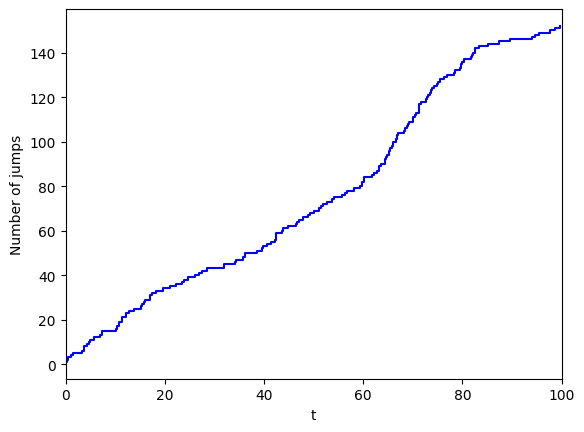

In [32]:
plt.step(filtered_T, np.arange(1, len(filtered_T) + 1), where='post', color='blue')
plt.xlim(0,Tmax)
plt.xlabel('t')
plt.ylabel('Number of jumps')
plt.savefig('Poisson_inhom.png')